### Import required libraries

In [800]:
# Part 1
import pandas as pd
import numpy as np
# Part 2
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# Part 3
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


## Data loading

Now lets load our data for our analysis

In [262]:
#read with pandas 
data=pd.read_csv('data.csv')

In [263]:
#print first 2 rows
data.head(2)

,Total accounts,Annual Review Month Unique Count,Service Month Unique Count,TFG,Fee Collected %,Frequent Trading Customer Partner Count,Activity Email Count,Activity Left Message Count,Annual Review Count,Service Count,...,Billable Month Volume,Traded100 Account Count,Traded1000 Account Count,Traded200 Account Count,Traded500 Account Count,Trading Customer Partner Count,Closing Available Balance,date,Floating rate,2 year fixed rate
0,3345,0,0,512760.98,0.795961,7258,0.0,0.0,0.0,0.0,...,9303622.659,2243,1424,2110,1786,12592,24587851.24,2000-02-01,7.5,8.6
1,3343,0,0,489407.27,0.751309,7448,6.0,0.0,0.0,0.0,...,8906479.081,2306,1489,2179,1828,12628,26308623.30,2000-04-01,8.0,8.5


## Exploratory Data Analysis


In [283]:
# Get dimensions of our data
data.shape

(245, 32)

In [284]:
# Summary of our features
data.describe()

,Total accounts,Annual Review Month Unique Count,Service Month Unique Count,TFG,Fee Collected %,Frequent Trading Customer Partner Count,Activity Email Count,Activity Left Message Count,Annual Review Count,Service Count,...,Trading Customer Partner Count,Closing Available Balance,Floating rate,2 year fixed rate,Transaction fee,% service,velocity,Frequent trade partner ratio,TFG per account,Billable Month Volume
count,245.000000,245.000000,245.000000,2.450000e+02,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,...,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000
mean,7124.391837,140.138776,2822.118367,8.924283e+05,0.751429,12382.946939,660.179592,1012.318367,145.453061,3809.085714,...,20291.448980,79336.772522,7.064898,6.583265,6.385838,0.623512,0.197914,2.919165,128.602730,14128.064978
std,1840.380955,111.009623,1441.820249,2.228066e+05,0.077455,3333.614624,507.514015,473.614637,115.784755,2133.805741,...,5757.321498,23126.795153,1.555791,1.361986,0.476125,0.225666,0.082950,0.789122,29.405607,3879.367750
min,3343.000000,0.000000,0.000000,1.703731e+05,0.535576,1892.000000,0.000000,0.000000,0.000000,0.000000,...,2772.000000,24587.851240,4.600000,3.700000,5.494958,0.000000,0.025385,0.552742,33.972708,2298.004410
25%,5665.000000,62.000000,1562.000000,7.470082e+05,0.703632,10148.000000,291.000000,715.000000,64.000000,1989.000000,...,16895.000000,62227.947250,5.800000,5.400000,6.089006,0.501932,0.134107,2.308419,110.057945,11782.895240
50%,6933.000000,115.000000,2941.000000,8.879426e+05,0.740442,12942.000000,656.000000,1028.000000,119.000000,3712.000000,...,20830.000000,82982.172820,6.400000,6.500000,6.198985,0.660994,0.194992,2.923472,126.664989,14197.880240
75%,8605.000000,188.000000,4034.000000,1.027947e+06,0.800210,14984.000000,905.000000,1378.000000,192.000000,5676.000000,...,23803.000000,100126.733300,8.200000,7.600000,6.960695,0.786122,0.247947,3.563634,148.838925,16625.137010
max,11203.000000,669.000000,5569.000000,1.506060e+06,0.918452,19031.000000,2800.000000,2016.000000,684.000000,8860.000000,...,35423.000000,112316.244700,10.700000,9.600000,7.513969,1.087262,0.524645,5.024648,230.750244,24637.096760


### Distribution of Revenue


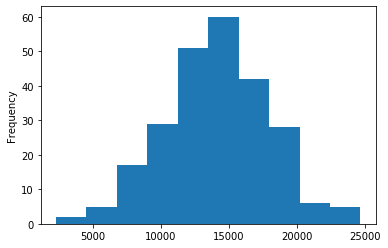

In [287]:
#plot the same histogram with matplotlib
data['Billable Month Volume'].plot.hist()
#show the plot
plt.show()

### TV Transaction processed Count vs Revenue

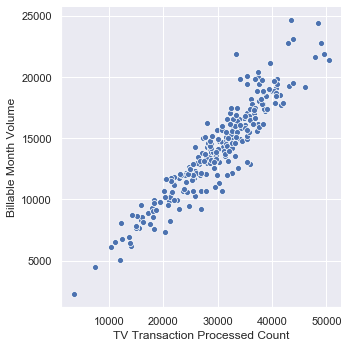

In [288]:
# TV Transaction processed Count vs Revenue
sns.set(style="darkgrid")           
sns.relplot(x="TV Transaction Processed Count", y="Billable Month Volume", data=data);

### Service visit vs Revenue

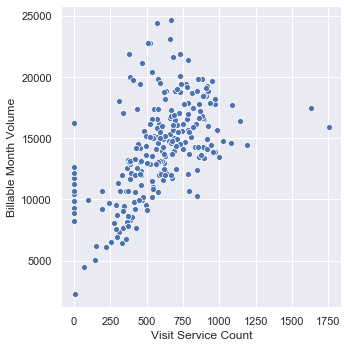

In [289]:
# Service vs Revenue
sns.set(style="darkgrid")           
sns.relplot(x="Visit Service Count", y="Billable Month Volume", data=data);

### Transaction fee vs Revenue

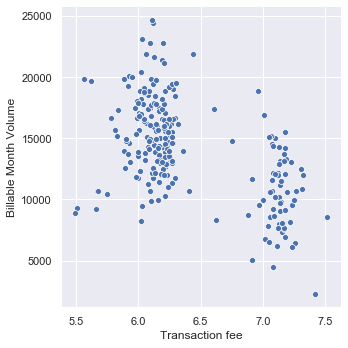

In [292]:
# Transction fee vs Revenue
sns.set(style="darkgrid")           
sns.relplot(x="Transaction fee", y="Billable Month Volume", data=data);

### Revenue over time

In [299]:
#Create Year columns
data['year'] = pd.DatetimeIndex(datab['date']).year

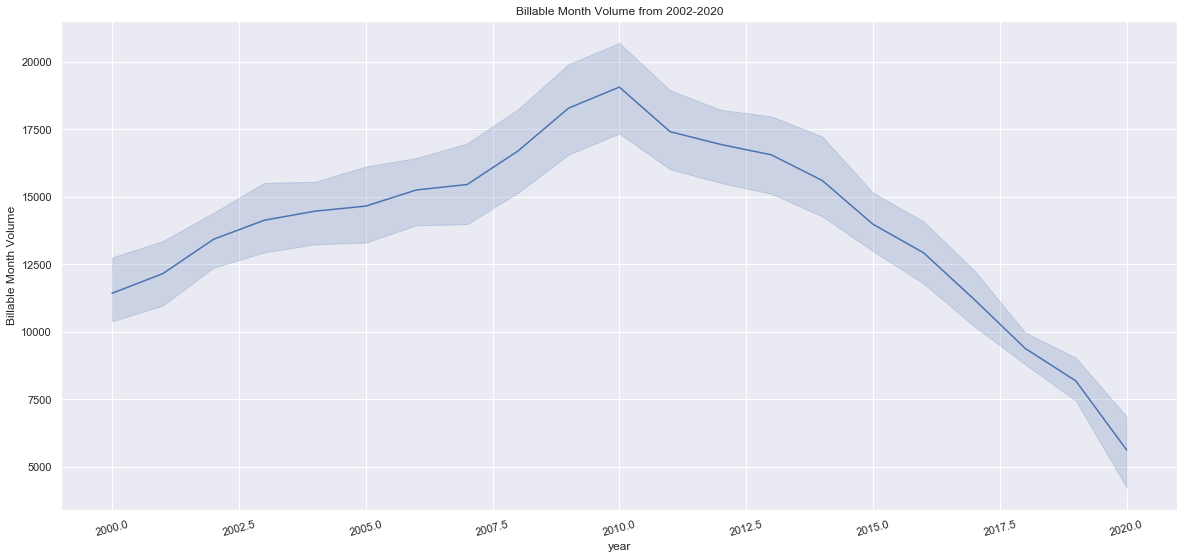

In [300]:
# Revenue 
sns.lineplot(x="year", y="Billable Month Volume", data=data)
plt.xticks(rotation=15)
fig = plt.gcf()
fig.set_size_inches(20,9)
plt.title('Billable Month Volume from 2002-2020')
plt.show()


### Velocity over time

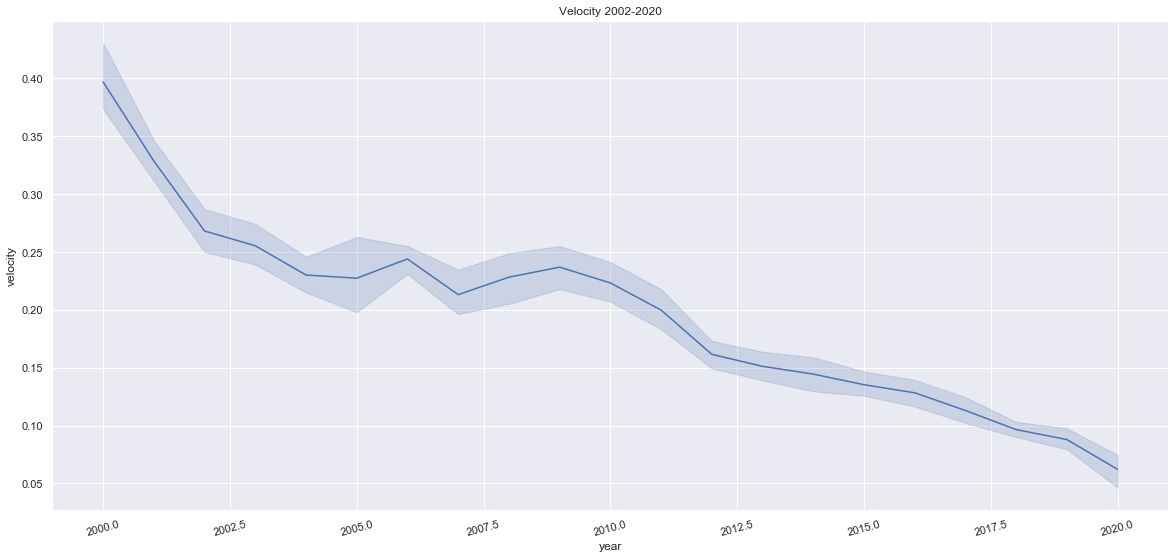

In [303]:
# Velocity
sns.lineplot(x="year", y="velocity", data=datab)
plt.xticks(rotation=15)
fig = plt.gcf()
fig.set_size_inches(20,9)
plt.title('Velocity 2002-2020')
plt.show()


### Total accounts

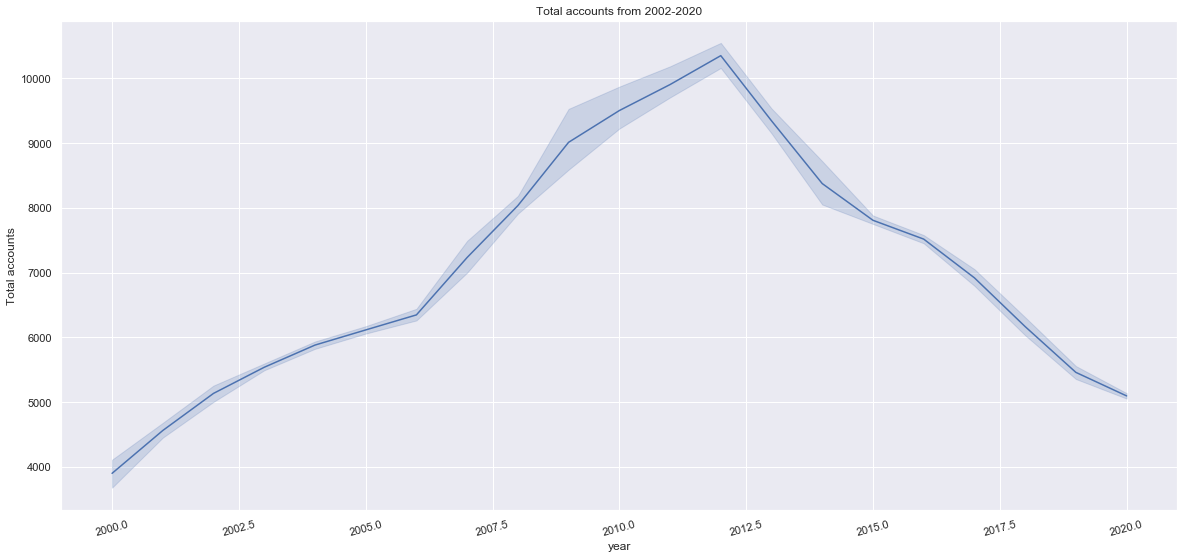

In [304]:
# Total account
sns.lineplot(x="year", y="Total accounts", data=data)
plt.xticks(rotation=15)
fig = plt.gcf()
fig.set_size_inches(20,9)
plt.title('Total accounts from 2002-2020')
plt.show()

### Transaction fee

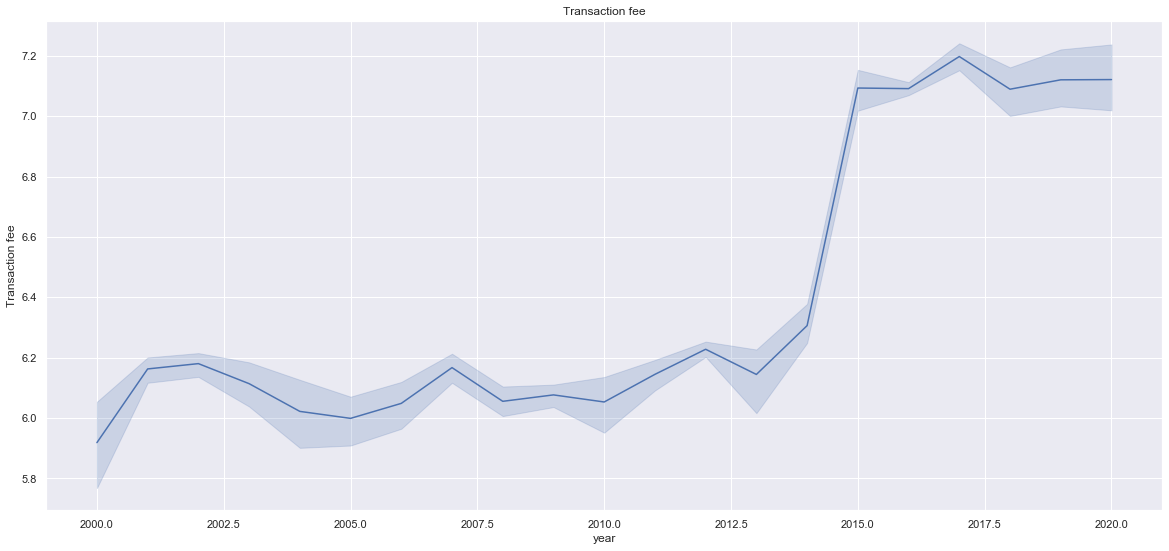

In [305]:
# Transaction fee
sns.lineplot(x="year", y="Transaction fee", data=datab)
fig = plt.gcf()
fig.set_size_inches(20,9)
plt.title('Transaction fee')
plt.show()

### All variables in one graph with MinMax Scaler

In [314]:
#Get MinMaxScaler
scaler = MinMaxScaler()
#Extract our independents
df_g=data[['TV Transaction Processed Count','Total accounts','Visit Service Count','Transaction fee','Billable Month Volume']]=scaler.fit_transform(data[['TV Transaction Processed Count','Total accounts','Visit Service Count','Transaction fee','Billable Month Volume']])
#Extract date
df_t=datab[['year']]
#convert to dataframe
df_g2 = pd.DataFrame({'TV Transacion processed count': df_g[:, 0],'Total accounts': df_g[:, 1], 'Visit Service visit': df_g[:, 2],'Transaction fee': df_g[:, 3],'Billable Month Volume': df_g[:, 4]})
#merge 2 dataframe
con = pd.concat([df_t, df_g2], axis=1)


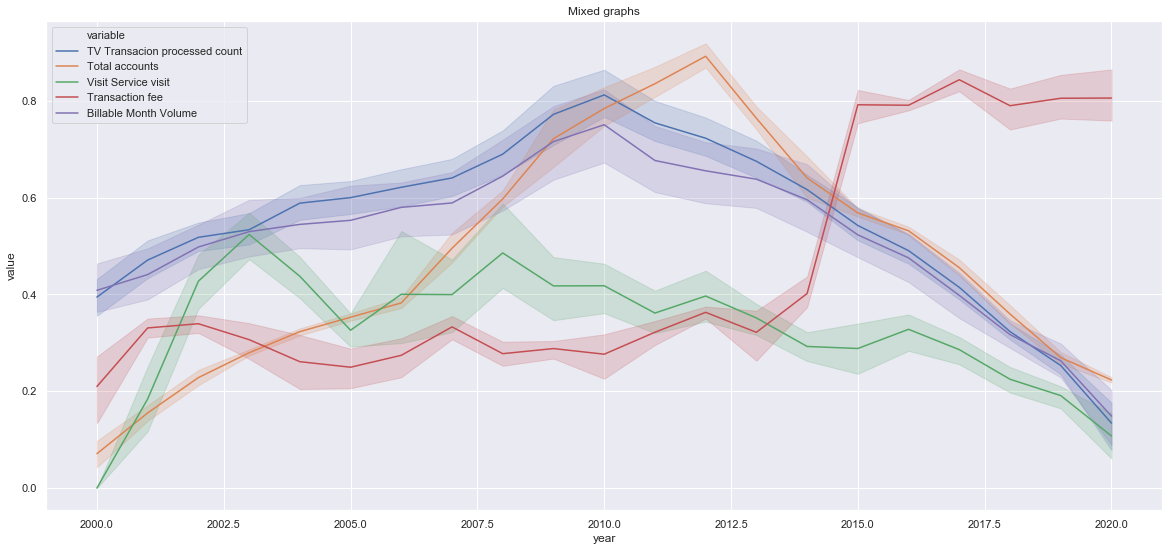

In [317]:
# Plot all variables in same scale
sns.lineplot(x='year', y='value', hue='variable', 
           data=pd.melt(con, ['year']))
fig = plt.gcf()
fig.set_size_inches(20,9)
plt.title('Mixed graphs')
plt.show()




Last we will look at pairpots for our variables

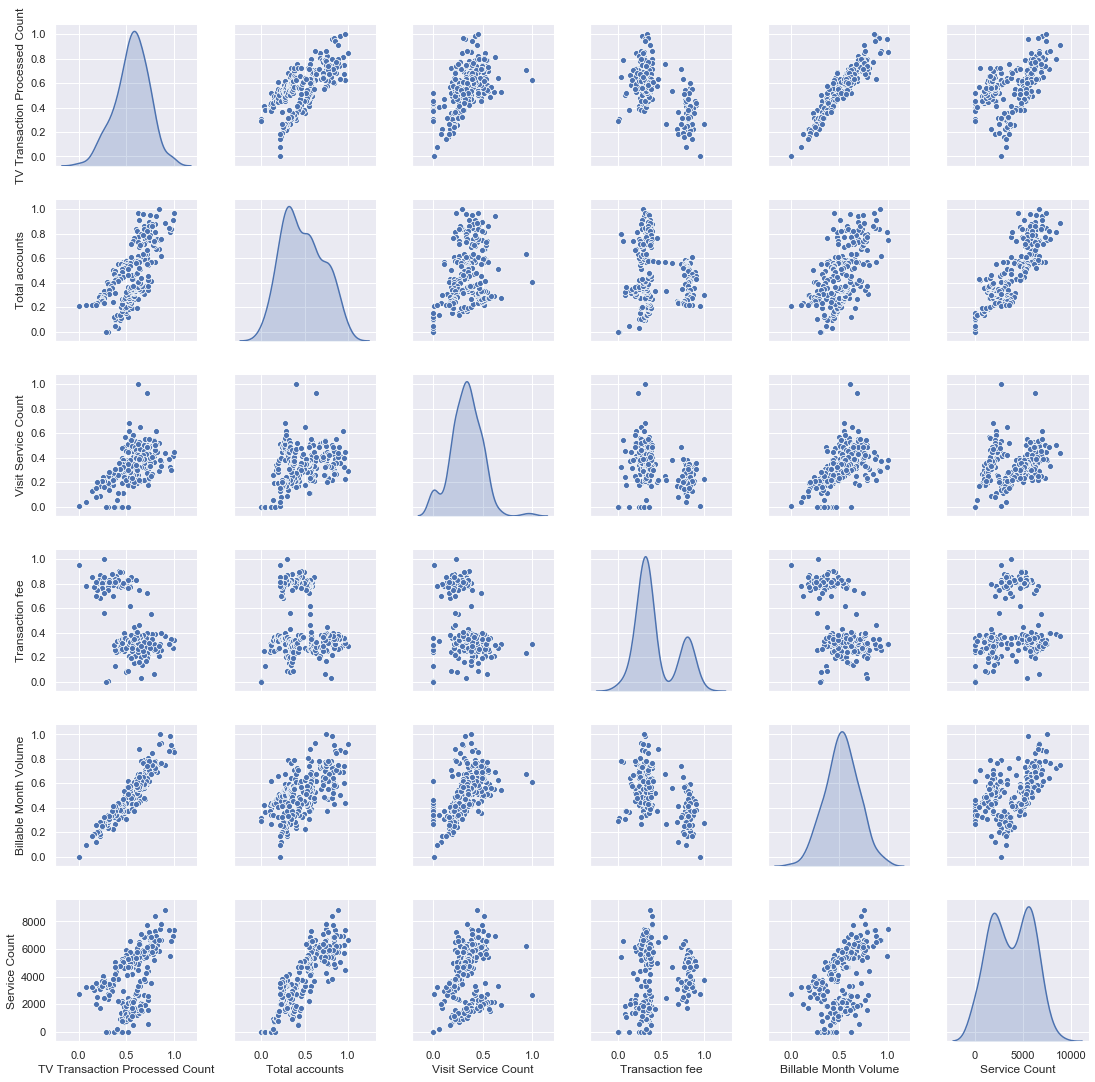

In [319]:
#Plot pairplot

sns.pairplot(data[['TV Transaction Processed Count','Total accounts','Visit Service Count','Transaction fee','Billable Month Volume','Service Count']], diag_kind="kde")

